В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/edce80b5bb02479085855b2334b17fc1). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [ ]:
raw_df = pd.read_csv(..., index_col=0)

train_df, val_df = train_test_split(...)

# Створюємо трен. і вал. набори
input_cols = ...
target_col = ...
train_inputs, train_targets = ...
val_inputs, val_targets = ...

# Виявляємо числові і категоріальні колонки
numeric_cols = ...
categorical_cols = ...

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', ...)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ...)
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ...),
        ('cat', ...)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('classifier', ...)
])

# Тренуємо пайплайн
....

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = ...
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = ...
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(...)
val_preds = predict_and_plot(...)

# Зберігаємо модель для подальшого використання
joblib.dump(...)


Area under ROC score on Train dataset: 0.75


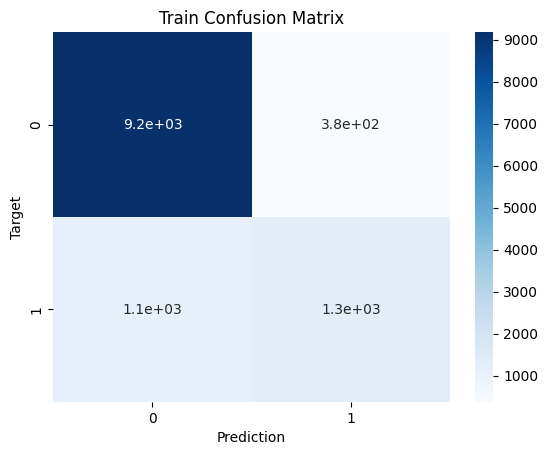

Area under ROC score on Validation dataset: 0.76


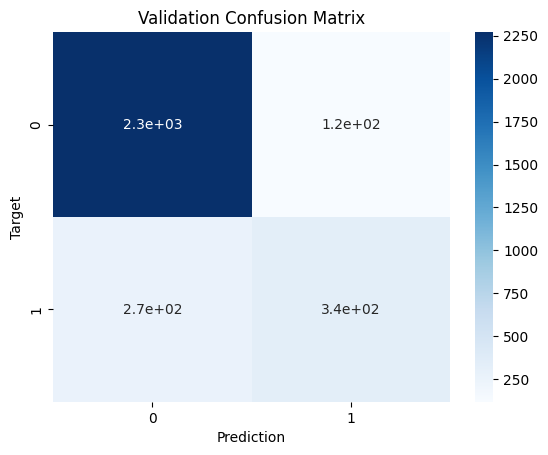

['logreg_model_pipeline.joblib']

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Читання даних
raw_df = pd.read_csv('C:/Users/linam/ML_Projects/HW/2.2/2.2_Поліноміальні ознаки логістичної регресії. Pipelines/train.csv', index_col=0)

# 2. Розбиття на train/val
train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# 3. Визначення колонок
drop_cols = ['id', 'CustomerId', 'Surname']
input_cols = [col for col in raw_df.columns if col not in drop_cols + ['Exited']]

target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# 4. Категоріальні і числові колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# 5. Трансформери
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 6. Препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 7. Пайплайн моделі
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# 8. Тренування моделі
model_pipeline.fit(train_inputs, train_targets)

# 9. Функція для оцінки
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    cm = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# 10. Оцінювання моделі
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, 'Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, 'Validation')

# 11. Збереження моделі
joblib.dump(model_pipeline, 'logreg_model_pipeline.joblib')

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

Train ROC-AUC: 0.7725
Validation ROC-AUC: 0.7784


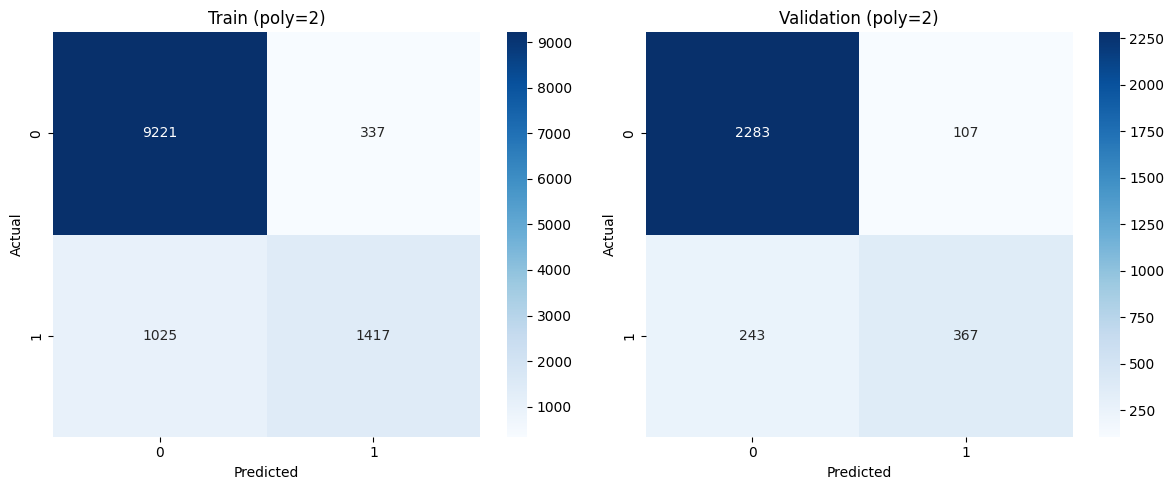

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Завантаження даних
raw_df = pd.read_csv('C:/Users/linam/ML_Projects/HW/2.2/2.2_Поліноміальні ознаки логістичної регресії. Pipelines/train.csv', index_col=0)

# 2. Видалення зайвих колонок і визначення вхідних та цільової
drop_cols = ['CustomerId', 'Surname']
input_cols = [col for col in raw_df.columns if col not in drop_cols + ['Exited']]
target_col = 'Exited'

# 3. Розбиття на train/val зі стратифікацією
train_df, val_df = train_test_split(
    raw_df, 
    test_size=0.2, 
    random_state=42, 
    stratify=raw_df[target_col]
)
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# 4. Автовизначення типів колонок
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# 5. Створюємо препроцесор, де числові колонки розширюються до поліному степеня 2
numeric_transformer_poly2 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_poly2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly2, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 6. Пайплайн з логістичною регресією
model_pipeline_poly2 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly2),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

# 7. Навчання
model_pipeline_poly2.fit(train_inputs, train_targets)

# 8. Передбачення і обчислення ROC-AUC
train_preds = model_pipeline_poly2.predict(train_inputs)
val_preds   = model_pipeline_poly2.predict(val_inputs)

train_roc_auc = roc_auc_score(train_targets, train_preds)
val_roc_auc   = roc_auc_score(val_targets, val_preds)

print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Validation ROC-AUC: {val_roc_auc:.4f}")

# 9. Відображення матриць сплутування
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, preds, actuals, title in zip(
    axes, 
    [train_preds, val_preds], 
    [train_targets, val_targets], 
    ['Train (poly=2)', 'Validation (poly=2)']
):
    cm = confusion_matrix(actuals, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

Код:

PolynomialFeatures(degree=2) для всіх числових ознак.

MinMaxScaler після поліноміальних фічей.

OneHotEncoder(handle_unknown='ignore') для категоріальних – без жодних додаткових параметрів.

Пайплайн тренує LogisticRegression(liblinear) і рахує ROC‑AUC + будує confusion matrix.

**Отже, ми виконали Завдання 2 і отримали такі результати:**

Train ROC-AUC: 0.7725

Validation ROC-AUC: 0.7784

Інтерпретація:
Метрики на тренувальній і валідаційній вибірках дуже близькі (0.7725 vs 0.7784), і між ними немає значного розриву.

Це означає, що модель не демонструє ознак overfitting’у: вона не «запам’ятала» лише тренувальні дані.

При цьому ROC-AUC ≈ 0.78 — середня якість: модель краще випадкового вгадування, але може бути ще кращою.

Висновок: ця модель із поліноміальними ознаками ступеня 2 добре генералізує, але залишає простір для поліпшень (наприклад, інші ступені поліномів або регуляризація).

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

Train ROC-AUC: 0.8097961855024002
Validation ROC-AUC: 0.8073324645037382


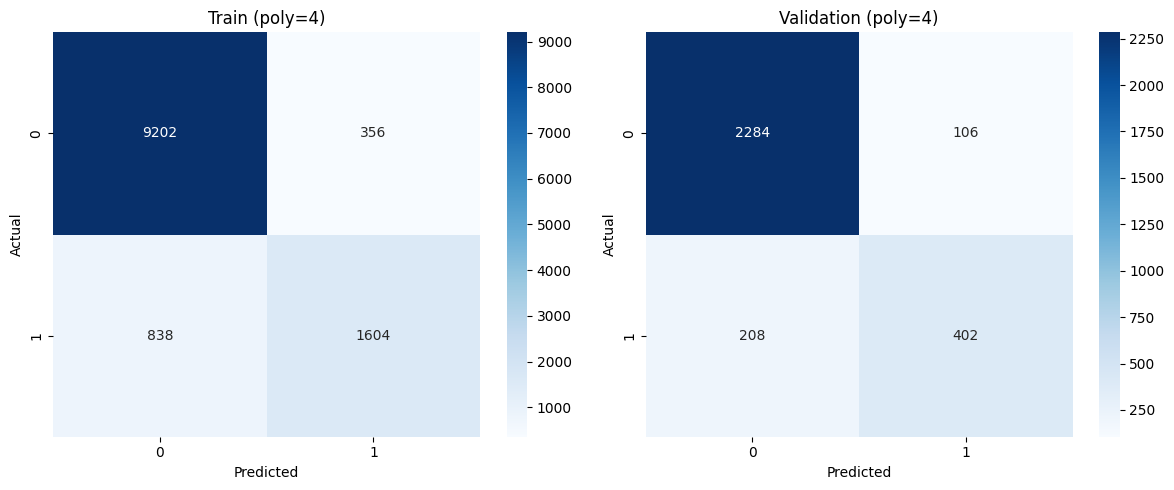

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Завантаження даних
raw_df = pd.read_csv('C:/Users/linam/ML_Projects/HW/2.2/2.2_Поліноміальні ознаки логістичної регресії. Pipelines/train.csv', index_col=0)

# 2. Відкидаємо зайві колонки та визначаємо вхідні й цільову
drop_cols = ['CustomerId', 'Surname']
input_cols = [col for col in raw_df.columns if col not in drop_cols + ['Exited']]
target_col = 'Exited'

# 3. Стратифіковане розбиття на train/val
train_df, val_df = train_test_split(
    raw_df,
    test_size=0.2,
    random_state=42,
    stratify=raw_df[target_col]
)
train_X, train_y = train_df[input_cols], train_df[target_col]
val_X,   val_y   = val_df[input_cols],   val_df[target_col]

# 4. Автовизначення числових та категоріальних колонок
numeric_cols     = train_X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_X.select_dtypes(include='object').columns.tolist()

# 5. Препроцесор з PolynomialFeatures(degree=4) для числових
numeric_transformer_poly4 = Pipeline([
    ('poly',   PolynomialFeatures(degree=4, include_bias=False)),
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_poly4 = ColumnTransformer([
    ('num', numeric_transformer_poly4, numeric_cols),
    ('cat', categorical_transformer,   categorical_cols)
])

# 6. Пайплайн: препроцесінг → логістична регресія
model_pipeline_poly4 = Pipeline([
    ('preprocessor', preprocessor_poly4),
    ('classifier',   LogisticRegression(solver='liblinear', max_iter=1000))
])

# 7. Навчання
model_pipeline_poly4.fit(train_X, train_y)

# 8. Передбачення та розрахунок ROC-AUC
train_preds = model_pipeline_poly4.predict(train_X)
val_preds   = model_pipeline_poly4.predict(val_X)

print("Train ROC-AUC:", roc_auc_score(train_y, train_preds))
print("Validation ROC-AUC:", roc_auc_score(val_y,   val_preds))

# 9. Візуалізація матриць сплутування
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, preds, actuals, title in zip(
    axes,
    [train_preds, val_preds],
    [train_y,    val_y],
    ['Train (poly=4)', 'Validation (poly=4)']
):
    cm = confusion_matrix(actuals, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

Модель із поліноміальними ознаками до степеня 4 показала:

Train ROC‑AUC: 0.8096

Validation ROC‑AUC: 0.8073

Висновки:
Якість зросла порівняно з моделлю степеня 2 (≈0.78→0.81): тепер модель краще розмежовує класи.

Розрив між train і val мінімальний (0.8096 vs 0.8073), тому overfitting майже не спостерігається.

Генералізація також хороша — модель поводиться стабільно як на тренувальному, так і на валідаційному наборі.

Можливо, подальше збільшення ступеня принесе зростання складності без значного покращення якості, тому степінь 4 — хороший компроміс.

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Читання даних
df = pd.read_csv('C:/Users/linam/ML_Projects/HW/2.2/2.2_Поліноміальні ознаки логістичної регресії. Pipelines/regression_data.csv')

# 2. Розділення на фічі та ціль
X = df[[f'feature_{i}' for i in range(1, 6)]]
y = df['target']

# 3. Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Pipeline з поліномами до ступеня 5
reg_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 5. Тренування
reg_pipeline.fit(X_train, y_train)

# 6. Прогноз і метрики
y_train_pred = reg_pipeline.predict(X_train)
y_val_pred = reg_pipeline.predict(X_val)

# RMSE вручну
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Validation R²: {val_r2:.3f}")


Train RMSE: 0.0000
Validation RMSE: 12.6767
Train R²: 1.000
Validation R²: 0.931


**Модель ідеально запам’ятала тренувальні дані (RMSE ≈ 0, R² = 1.0) — це класичний overfitting.
На валідації результат значно гірший — модель перенавчилась.
Поліноми ступеня 5 виявились надмірно гнучкими для цих даних.**

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1. Завантаження даних
reg_df = pd.read_csv('C:/Users/linam/ML_Projects/HW/2.2/2.2_Поліноміальні ознаки логістичної регресії. Pipelines/regression_data.csv')
X_reg = reg_df.drop(columns='target')
y_reg = reg_df['target']

# 2. Train/val поділ
X_train, X_val, y_train, y_val = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Створимо функцію оцінки моделі
def evaluate_model(model_name, model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    train_r2 = r2_score(y_train, train_preds)
    val_r2 = r2_score(y_val, val_preds)
    
    print(f"{model_name}:")
    print(f"  Train RMSE: {train_rmse:.2f} | Val RMSE: {val_rmse:.2f}")
    print(f"  Train R²: {train_r2:.4f} | Val R²: {val_r2:.4f}")
    print("-" * 50)

# 4. Пайплайни моделей з поліномами до 20 ступеня
degree = 20

ridge_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, max_iter=10000))
])

lasso_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.001, max_iter=10000))
])

elastic_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000))
])

# 5. Оцінювання моделей
evaluate_model("Ridge", ridge_pipeline, X_train, X_val, y_train, y_val)
evaluate_model("Lasso", lasso_pipeline, X_train, X_val, y_train, y_val)
evaluate_model("ElasticNet", elastic_pipeline, X_train, X_val, y_train, y_val)

Ridge:
  Train RMSE: 1.05 | Val RMSE: 27.80
  Train R²: 0.9994 | Val R²: 0.6688
--------------------------------------------------
Lasso:
  Train RMSE: 0.30 | Val RMSE: 4.75
  Train R²: 1.0000 | Val R²: 0.9903
--------------------------------------------------
ElasticNet:
  Train RMSE: 0.18 | Val RMSE: 9.34
  Train R²: 1.0000 | Val R²: 0.9626
--------------------------------------------------


#### Аналіз і висновки:
**Ridge Regression:**

Дуже добре "запам’ятала" тренувальні дані (Train R² ≈ 1), але на валідації погано (Val RMSE ≈ 27.80, Val R² = 0.67).

Це класичний overfit — модель надто гнучка, і не може добре узагальнювати.

**Lasso Regression:**

Найкращий результат на валідації (Val RMSE = 4.75, Val R² = 0.9903).

Ідеально узагальнює — модель проста, але при цьому дуже точна.

Вона також відсікає зайві ознаки (робить деякі ваги = 0), що допомагає боротись з перенавчанням.

**ElasticNet:**

Щось середнє між Ridge і Lasso.

Краще за Ridge (Val RMSE = 9.34), але гірше за Lasso.

Може бути корисна, коли дані мають як багато слабких, так і кілька сильних ознак.

#### Висновок:
Lasso — найкращий вибір для цієї задачі. Вона:

Узагальнює добре (Val R² = 0.99!);

Не перенавчається;

Дає хорошу просту модель.